In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mplfinance as mpf

In [14]:
df = pd.read_csv('../data/BTC-USD.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
1,2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2,2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10
3,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,3.334676e+10
4,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,2.065316e+10


In [11]:
df['Volume'].rolling(window=4).mean()

0               NaN
1               NaN
2               NaN
3      1.948783e+10
4      2.225969e+10
           ...     
362    3.199329e+10
363    2.624457e+10
364    2.094037e+10
365             NaN
366             NaN
Name: Volume, Length: 367, dtype: float64

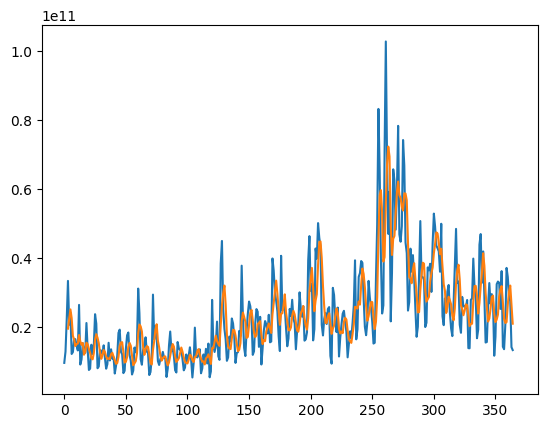

In [12]:
plt.plot(df.index, df['Volume'], label='Volume')
plt.plot(df.index, df['Volume'].rolling(window=4).mean(), label='Moving Average Volume')

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
1,2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2,2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10
3,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,3.334676e+10
4,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,2.065316e+10


In [35]:
df_indexed = df.set_index('Date')

In [36]:
df_indexed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10
2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,3.334676e+10
2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,2.065316e+10


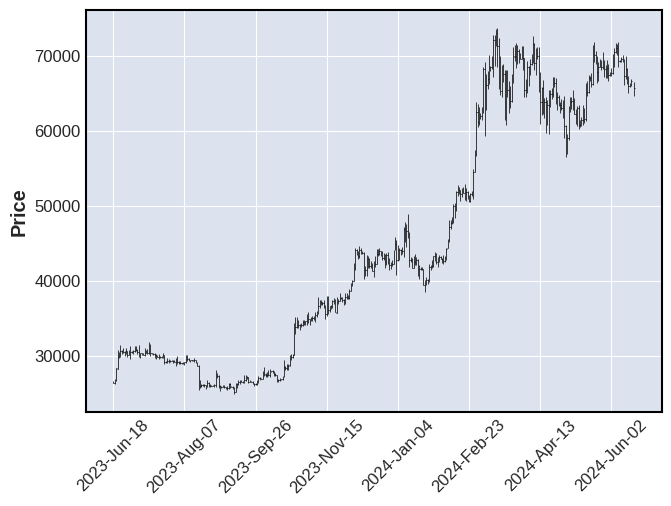

In [37]:
mpf.plot(df_indexed)

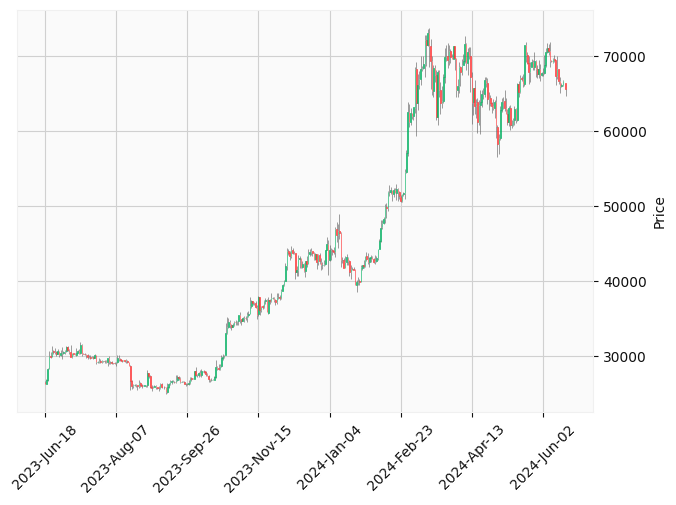

In [43]:
mpf.plot(df_indexed, type='candle', style='yahoo')

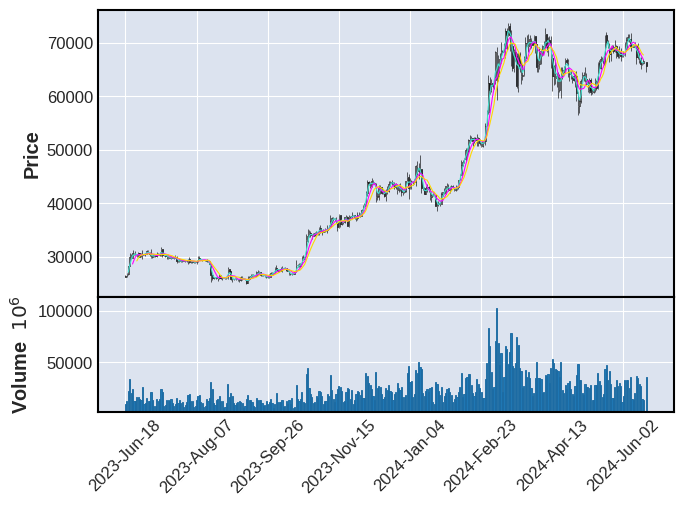

In [39]:
mpf.plot(df_indexed, type='candle', mav=(3,6,9), volume=True)

In [1]:
from ta import add_all_ta_features

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
1,2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2,2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10
3,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,3.334676e+10
4,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,2.065316e+10


In [9]:
data = add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)


In [19]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [20]:
df.iloc[:,4:5].dropna()

,Close
0,26336.212891
1,26851.029297
2,28327.488281
3,30027.296875
4,29912.281250
...,...
361,66756.398438
362,66011.093750
363,66191.000000
364,66639.046875


In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9.565695e+09
1,2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,1.282699e+10
2,2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,2.221186e+10
3,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,3.334676e+10
4,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,2.065316e+10


In [1]:
from backtrader.analyzers import Returns, DrawDown, SharpeRatio, TradeAnalyzer

In [2]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import datetime
import os.path
import sys
import backtrader as bt

In [39]:
class TestStrategy(bt.Strategy):
    params = (
        ('shortperiod', 15),
        ('longperiod', 200),
    )

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None

        self.smashort = bt.indicators.SimpleMovingAverage(self.datas[0], period = self.params.shortperiod)
        self.smalong = bt.indicators.SimpleMovingAverage(self.datas[0], period = self.params.longperiod)

    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('Buy Executed, Price: %.2f, Cost: %.2f, Comm: %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm

            
            else:
                self.log('Sell Executed, Price: %.2f, Cost: %.2f, Comm: %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Cancled/margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log('Operation PROFIT , GROSS %.2f, NET %.2f'%
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Log the closing price
        self.log('Close, %.2f' % self.dataclose[0])
        
        # Check if an order is pending, if yes, we cannot send a second one
        if self.order:
            return
        
        # Buy on the first day
        if not self.position:
            if self.smashort[0] > self.smalong[0]:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.log('smashort %s' % self.smashort[0])
                self.log('smalong %s' % self.smalong[0])
                self.order = self.buy()
            
        else:
            if self.smashort[0] < self.smalong[0]:
                    self.log('Sell CREATE, %.2f' % self.dataclose[0])
                    self.order = self.sell()


In [40]:
cerbero = bt.Cerebro()

cerbero.addstrategy(TestStrategy)
cerbero.addanalyzer(SharpeRatio, _name='sharpe')
cerbero.addanalyzer(Returns, _name='returns')
cerbero.addanalyzer(DrawDown, _name='draw')
cerbero.addanalyzer(TradeAnalyzer, _name='trade')

data_path = '../data/BTC-USD.csv'

data = bt.feeds.YahooFinanceCSVData(
    dataname=data_path,
    fromdate = datetime.datetime(2023, 6, 18),
    todate = datetime.datetime(2024, 6, 18),
    reverse = False
)

cerbero.adddata(data)

cerbero.broker.setcash(100000)

cerbero.broker.setcommission(commission=0.01)

print(f"Starting Portofoio cash: {cerbero.broker.getvalue()}")
result = cerbero.run()

print(f"End: {cerbero.broker.getvalue()}")

Starting Portofoio cash: 100000
2024-01-03, Close, 42848.18
2024-01-03, BUY CREATE, 42848.18
2024-01-03, smashort 43264.946
2024-01-03, smalong 32203.969950000002
2024-01-04, Buy Executed, Price: 42855.82, Cost: 42855.82, Comm: 428.56
2024-01-04, Close, 44179.92
2024-01-05, Close, 44162.69
2024-01-06, Close, 43989.20
2024-01-07, Close, 43943.10
2024-01-08, Close, 46970.50
2024-01-09, Close, 46139.73
2024-01-10, Close, 46627.78
2024-01-11, Close, 46368.59
2024-01-12, Close, 42853.17
2024-01-13, Close, 42842.38
2024-01-14, Close, 41796.27
2024-01-15, Close, 42511.97
2024-01-16, Close, 43154.95
2024-01-17, Close, 42742.65
2024-01-18, Close, 41262.06
2024-01-19, Close, 41618.41
2024-01-20, Close, 41665.59
2024-01-21, Close, 41545.79
2024-01-22, Close, 39507.37
2024-01-23, Close, 39845.55
2024-01-24, Close, 40077.07
2024-01-25, Close, 39933.81
2024-01-26, Close, 41816.87
2024-01-27, Close, 42120.05
2024-01-28, Close, 42035.59
2024-01-29, Close, 43288.25
2024-01-30, Close, 42952.61
2024-01-3

In [42]:
res = result[0]

In [43]:
res_sha = res.analyzers.sharpe.get_analysis()
res_ret = res.analyzers.returns.get_analysis()
res_draw = res.analyzers.draw.get_analysis()
res_trade = res.analyzers.trade.get_analysis()

In [44]:
res_sha

OrderedDict([('sharperatio', 0.9143640288706605)])

In [45]:
res_ret

OrderedDict([('rtot', 0.20989353061136493),
             ('ravg', 0.0005750507687982601),
             ('rnorm', 0.15593876077307872),
             ('rnorm100', 15.593876077307872)])

In [46]:
res_draw

AutoOrderedDict([('len', 95),
                 ('drawdown', 4.964941141843675),
                 ('moneydown', 6444.4499999999825),
                 ('max',
                  AutoOrderedDict([('len', 95),
                                   ('drawdown', 11.424954032316105),
                                   ('moneydown', 14829.48999999999)]))])

In [47]:
res_trade

AutoOrderedDict([('total', AutoOrderedDict([('total', 1), ('open', 1)]))])

In [18]:
import datetime
import backtrader as bt

class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        #self.order = None

    def next(self):
        # Log the closing price
        #self.log('Close, %.2f' % self.dataclose[0])
        
        # Check if an order is pending, if yes, we cannot send a second one
        #if self.order:
         #   return
        
        # Buy on the first day
        if self.dataclose[0] < self.dataclose[-1]:
            #self.log('But Create %s'% self.dataclose[0])
            self.buy()
        
        # Sell on the last day
        elif self.dataclose[0] > self.dataclose[-1]:
            #self.log('Sell Create %s'% self.dataclose[0])
            self.sell()

# Create a Cerebro instance
cerebro = bt.Cerebro()

# Add strategy to Cerebro
cerebro.addstrategy(TestStrategy)

# Add analyzers
cerebro.addanalyzer(SharpeRatio, _name='sharpe')
cerebro.addanalyzer(Returns, _name='returns')
cerebro.addanalyzer(DrawDown, _name='draw')
cerebro.addanalyzer(TradeAnalyzer, _name='trade')

# Load data
data_path = '../data/BTC-USD.csv'
data = bt.feeds.YahooFinanceCSVData(
    dataname=data_path,
    fromdate=datetime.datetime(2023, 6, 18),
    todate=datetime.datetime(2024, 6, 18),
    reverse=False
)

cerebro.adddata(data)

# Set initial cash
cerebro.broker.setcash(10000)

# Print starting portfolio value
print(f"Starting Portfolio Value: {cerebro.broker.getvalue()}")

# Run the backtest
result = cerebro.run()

# Print ending portfolio value
print(f"Ending Portfolio Value: {cerebro.broker.getvalue()}")

# Extract and print analyzer results
res = result[0]
res_sha = res.analyzers.sharpe.get_analysis()
res_ret = res.analyzers.returns.get_analysis()
res_draw = res.analyzers.draw.get_analysis()
res_trade = res.analyzers.trade.get_analysis()

print("Sharpe Ratio:", res_sha)
print("Returns:", res_ret)
print("DrawDown:", res_draw)
print("TradeAnalyzer:", res_trade)


Starting Portfolio Value: 10000
Ending Portfolio Value: -465772.1099999987
Sharpe Ratio: OrderedDict([('sharperatio', 0.07323072195448127)])
Returns: OrderedDict([('rtot', -inf), ('ravg', -inf), ('rnorm', -inf), ('rnorm100', -inf)])
DrawDown: AutoOrderedDict([('len', 278), ('drawdown', 3703.1620452456596), ('moneydown', 478698.8699999987), ('max', AutoOrderedDict([('len', 278), ('drawdown', 5416.519684746978), ('moneydown', 700180.4999999998)]))])
TradeAnalyzer: AutoOrderedDict([('total', AutoOrderedDict([('total', 19), ('open', 1), ('closed', 18)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 0), ('longest', 7)])), ('lost', AutoOrderedDict([('current', 1), ('longest', 1)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', 1078.2999999999847), ('average', 59.905555555554706)])), ('net', AutoOrderedDict([('total', 1078.2999999999847), ('average', 59.905555555554706)]))])), ('won', AutoOrderedDict([('total', 14), ('pnl', AutoOrderedDict([('total', 8

In [ ]:
res_sha = res.analyzers.sharpe.get_analysis()
res_ret = res.analyzers.returns.get_analysis()
res_draw = res.analyzers.draw.get_analysis()
res_trade = res.analyzers.trade.get_analysis()

In [15]:
res_sha

OrderedDict([('sharperatio', 0.07323072195448127)])

In [16]:
res_ret

OrderedDict([('rtot', -inf),
             ('ravg', -inf),
             ('rnorm', -inf),
             ('rnorm100', -inf)])

In [20]:
res_draw

AutoOrderedDict([('len', 278),
                 ('drawdown', 3703.1620452456596),
                 ('moneydown', 478698.8699999987),
                 ('max',
                  AutoOrderedDict([('len', 278),
                                   ('drawdown', 5416.519684746978),
                                   ('moneydown', 700180.4999999998)]))])

In [21]:
res_trade

AutoOrderedDict([('total',
                  AutoOrderedDict([('total', 19),
                                   ('open', 1),
                                   ('closed', 18)])),
                 ('streak',
                  AutoOrderedDict([('won',
                                    AutoOrderedDict([('current', 0),
                                                     ('longest', 7)])),
                                   ('lost',
                                    AutoOrderedDict([('current', 1),
                                                     ('longest', 1)]))])),
                 ('pnl',
                  AutoOrderedDict([('gross',
                                    AutoOrderedDict([('total',
                                                      1078.2999999999847),
                                                     ('average',
                                                      59.905555555554706)])),
                                   ('net',
                           

In [24]:
shareratio = res_sha['sharperatio']
total_return = res_ret['rtot']
average_return = res_ret['ravg']
total_drawdown = res

In [31]:
res_draw['drawdown']

3703.1620452456596

In [32]:
res_draw

AutoOrderedDict([('len', 278),
                 ('drawdown', 3703.1620452456596),
                 ('moneydown', 478698.8699999987),
                 ('max',
                  AutoOrderedDict([('len', 278),
                                   ('drawdown', 5416.519684746978),
                                   ('moneydown', 700180.4999999998)]))])

In [65]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

import matplotlib
matplotlib.use('TkAgg')

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
                                            subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = '../data/BTC-USD.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2023 , 6, 18),
        # Do not pass values before this date
        todate=datetime.datetime(2024, 6, 18),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot()

Starting Portfolio Value: 100000.00
2023-07-21, Close, 29908.74
2023-07-22, Close, 29771.80
2023-07-23, Close, 30084.54
2023-07-24, Close, 29176.92
2023-07-25, Close, 29227.39
2023-07-26, Close, 29354.97
2023-07-27, Close, 29210.69
2023-07-28, Close, 29319.25
2023-07-29, Close, 29356.92
2023-07-30, Close, 29275.31
2023-07-31, Close, 29230.11
2023-08-01, Close, 29675.73
2023-08-01, BUY CREATE, 29675.73
2023-08-02, Order Canceled/Margin/Rejected
2023-08-02, Close, 29151.96
2023-08-03, Close, 29178.68
2023-08-04, Close, 29074.09
2023-08-05, Close, 29042.13
2023-08-06, Close, 29041.86
2023-08-07, Close, 29180.58
2023-08-08, Close, 29765.49
2023-08-08, BUY CREATE, 29765.49
2023-08-09, Order Canceled/Margin/Rejected
2023-08-09, Close, 29561.49
2023-08-09, BUY CREATE, 29561.49
2023-08-10, Order Canceled/Margin/Rejected
2023-08-10, Close, 29429.59
2023-08-10, BUY CREATE, 29429.59
2023-08-11, Order Canceled/Margin/Rejected
2023-08-11, Close, 29397.71
2023-08-11, BUY CREATE, 29397.71
2023-08-12,

<IPython.core.display.Javascript object>

In [71]:
cerebro.plot()

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 8 Axes>]]

In [67]:
cerebro.plot(style='candle')  # Optional styling argument
cerebro.plot.show()

<IPython.core.display.Javascript object>

AttributeError: 'function' object has no attribute 'show'

In [66]:
import backtrader.plot as btplot

btplot.plot(cerebro, style='candle')  # Optional styling argument

TypeError: 'module' object is not callable

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt  # Import for displaying plots

# Run the backtesting simulation
#cerebro.run()

# Generate the plot using cerebro.plot() with optional styling
cerebro.plot(style='candle')

# Display the plot using plt.show()
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
<div id='b7d2c1bf-9db2-4ff4-a40c-c2a7606fe069'></div>
<IPython.core.display.Javascript object>